In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://worldathletics.org/athletes/russia/irina-privalova-14299012'

page = requests.get(url)

white = BeautifulSoup(page.text,'html')

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research'
page = requests.get(url)

soup = BeautifulSoup(page.text,'html')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of datasets for machine-learning research - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-li

In [4]:
table = soup.find_all(class_="wikitable")[3]
table

<table class="wikitable sortable" style="width: 100%">
<tbody><tr>
<th scope="col" style="width: 15%;">Dataset Name
</th>
<th scope="col" style="width: 18%;">Brief description
</th>
<th scope="col" style="width: 18%;">Preprocessing
</th>
<th scope="col" style="width: 6%;">Instances
</th>
<th scope="col" style="width: 7%;">Format
</th>
<th scope="col" style="width: 7%;">Default Task
</th>
<th scope="col" style="width: 6%;">Created (updated)
</th>
<th scope="col" style="width: 6%;">Reference
</th>
<th scope="col" style="width: 11%;">Creator
</th></tr>
<tr>
<td><a href="/wiki/Netflix_Prize" title="Netflix Prize">Netflix Prize</a>
</td>
<td>Movie ratings on Netflix.
</td>
<td>
</td>
<td>100,480,507 ratings that 480,189 users gave to 17,770 movies
</td>
<td>Text, rating
</td>
<td>Rating prediction
</td>
<td>2006
</td>
<td><sup class="reference" id="cite_ref-bennet_5-0"><a href="#cite_note-bennet-5"><span class="cite-bracket">[</span>5<span class="cite-bracket">]</span></a></sup>
</td>
<td><

In [5]:
world_title = table.find_all('th')

In [6]:
world_title = [word.text.strip() for word in world_title]
world_title

['Dataset Name',
 'Brief description',
 'Preprocessing',
 'Instances',
 'Format',
 'Default Task',
 'Created (updated)',
 'Reference',
 'Creator']

In [7]:
df = pd.DataFrame(columns=world_title)
df

,Dataset Name,Brief description,Preprocessing,Instances,Format,Default Task,Created (updated),Reference,Creator


In [8]:
column_data = table.find_all('tr')
column_data

[<tr>
 <th scope="col" style="width: 15%;">Dataset Name
 </th>
 <th scope="col" style="width: 18%;">Brief description
 </th>
 <th scope="col" style="width: 18%;">Preprocessing
 </th>
 <th scope="col" style="width: 6%;">Instances
 </th>
 <th scope="col" style="width: 7%;">Format
 </th>
 <th scope="col" style="width: 7%;">Default Task
 </th>
 <th scope="col" style="width: 6%;">Created (updated)
 </th>
 <th scope="col" style="width: 6%;">Reference
 </th>
 <th scope="col" style="width: 11%;">Creator
 </th></tr>,
 <tr>
 <td><a href="/wiki/Netflix_Prize" title="Netflix Prize">Netflix Prize</a>
 </td>
 <td>Movie ratings on Netflix.
 </td>
 <td>
 </td>
 <td>100,480,507 ratings that 480,189 users gave to 17,770 movies
 </td>
 <td>Text, rating
 </td>
 <td>Rating prediction
 </td>
 <td>2006
 </td>
 <td><sup class="reference" id="cite_ref-bennet_5-0"><a href="#cite_note-bennet-5"><span class="cite-bracket">[</span>5<span class="cite-bracket">]</span></a></sup>
 </td>
 <td><a href="/wiki/Netflix" t

In [9]:
import re
for row in column_data[1:]:
    row_data = row.find_all('td')
    in_row_data = [data.text.strip() for data in row_data]
    in_row_data = [re.sub(r'href|rel|</p>|title|<td>|<a>', '', str(data)) for data in in_row_data]

    length=len(df) 
    df.loc[length] = in_row_data
df

,Dataset Name,Brief description,Preprocessing,Instances,Format,Default Task,Created (updated),Reference,Creator
0,Netflix Prize,Movie ratings on Netflix.,,"100,480,507 ratings that 480,189 users gave to...","Text, rating",Rating prediction,2006,[5],Netflix
1,Amazon reviews,US product reviews from Amazon.com.,None.,233.1 million,Text,"Classification, sentiment analysis",2015 (2018),[6][7],McAuley et al.
2,OpinRank Review Dataset,Reviews of cars and hotels from Edmunds.com an...,None.,"42,230 / ~259,000 respectively",Text,"Sentiment analysis, clustering",2011,[8][9],K. Ganesan et al.
3,MovieLens,"22,000,000 ratings and 580,000 tags applied to...",None.,~ 22M,Text,"Regression, clustering, classification",2016,[10],GroupLens Research
4,Yahoo! Music User Ratings of Musical Artists,Over 10M ratings of artists by Yahoo users.,None described.,~ 10M,Text,"Clustering, regression",2004,[11][12],Yahoo!
5,Car Evaluation Data Set,Car properties and their overall acceptability.,Six categorical features given.,1728,Text,Classification,1997,[13][14],M. Bohanec
6,YouTube Comedy Slam Preference Dataset,User vote data for pairs of videos shown on Yo...,Video metadata given.,"1,138,562",Text,Classification,2012,[15][16],Google
7,Skytrax User Reviews Dataset,"User reviews of airlines, airports, seats, and...",Ratings are fine-grain and include many aspect...,41396,Text,"Classification, regression",2015,[17],Q. Nguyen
8,Teaching Assistant Evaluation Dataset,Teaching assistant reviews.,"Features of each instance such as class, class...",151,Text,Classification,1997,[18][19],W. Loh et al.
9,Vietnamese Students’ Feedback Corpus (UIT-VSFC),Students’ Feedback.,Comments,"16,000",Text,Classification,1997,[20],Nguyen et al.


In [10]:
import re

for row in column_data[1:]:
    row_data = row.find_all('td')
    in_row_data = [data.text.strip() for data in row_data]
    in_row_data = [re.sub(r'href|rel|</p>|title', '', str(data)) for data in in_row_data]

    length=len(df) 
    df.loc[length] = in_row_data


In [11]:
df

,Dataset Name,Brief description,Preprocessing,Instances,Format,Default Task,Created (updated),Reference,Creator
0,Netflix Prize,Movie ratings on Netflix.,,"100,480,507 ratings that 480,189 users gave to...","Text, rating",Rating prediction,2006,[5],Netflix
1,Amazon reviews,US product reviews from Amazon.com.,None.,233.1 million,Text,"Classification, sentiment analysis",2015 (2018),[6][7],McAuley et al.
2,OpinRank Review Dataset,Reviews of cars and hotels from Edmunds.com an...,None.,"42,230 / ~259,000 respectively",Text,"Sentiment analysis, clustering",2011,[8][9],K. Ganesan et al.
3,MovieLens,"22,000,000 ratings and 580,000 tags applied to...",None.,~ 22M,Text,"Regression, clustering, classification",2016,[10],GroupLens Research
4,Yahoo! Music User Ratings of Musical Artists,Over 10M ratings of artists by Yahoo users.,None described.,~ 10M,Text,"Clustering, regression",2004,[11][12],Yahoo!
5,Car Evaluation Data Set,Car properties and their overall acceptability.,Six categorical features given.,1728,Text,Classification,1997,[13][14],M. Bohanec
6,YouTube Comedy Slam Preference Dataset,User vote data for pairs of videos shown on Yo...,Video metadata given.,"1,138,562",Text,Classification,2012,[15][16],Google
7,Skytrax User Reviews Dataset,"User reviews of airlines, airports, seats, and...",Ratings are fine-grain and include many aspect...,41396,Text,"Classification, regression",2015,[17],Q. Nguyen
8,Teaching Assistant Evaluation Dataset,Teaching assistant reviews.,"Features of each instance such as class, class...",151,Text,Classification,1997,[18][19],W. Loh et al.
9,Vietnamese Students’ Feedback Corpus (UIT-VSFC),Students’ Feedback.,Comments,"16,000",Text,Classification,1997,[20],Nguyen et al.


In [12]:
# df.to_csv(r"C:\Users\avina\Downloads\List of machineLearning dataset.csv",index=False)

In [13]:
dataset = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\intern_work\18-01-2025\List of machineLearning dataset.csv")

In [41]:
dataset.dropna()

,Dataset Name,Brief description,Preprocessing,Instances,Format,Default Task,Created (updated),Reference,Creator
1,Amazon reviews,US product reviews from Amazon.com.,None.,233.1 million,Text,"Classification, sentiment analysis",2015 (2018),[6][7],McAuley et al.
2,OpinRank Review Dataset,Reviews of cars and hotels from Edmunds.com an...,None.,"42,230 / ~259,000 respectively",Text,"Sentiment analysis, clustering",2011,[8][9],K. Ganesan et al.
3,MovieLens,"22,000,000 ratings and 580,000 tags applied to...",None.,~ 22M,Text,"Regression, clustering, classification",2016,[10],GroupLens Research
4,Yahoo! Music User Ratings of Musical Artists,Over 10M ratings of artists by Yahoo users.,None described.,~ 10M,Text,"Clustering, regression",2004,[11][12],Yahoo!
5,Car Evaluation Data Set,Car properties and their overall acceptability.,Six categorical features given.,1728,Text,Classification,1997,[13][14],M. Bohanec
6,YouTube Comedy Slam Preference Dataset,User vote data for pairs of videos shown on Yo...,Video metadata given.,"1,138,562",Text,Classification,2012,[15][16],Google
7,Skytrax User Reviews Dataset,"User reviews of airlines, airports, seats, and...",Ratings are fine-grain and include many aspect...,41396,Text,"Classification, regression",2015,[17],Q. Nguyen
8,Teaching Assistant Evaluation Dataset,Teaching assistant reviews.,"Features of each instance such as class, class...",151,Text,Classification,1997,[18][19],W. Loh et al.
9,Vietnamese Students’ Feedback Corpus (UIT-VSFC),Students’ Feedback.,Comments,"16,000",Text,Classification,1997,[20],Nguyen et al.
10,Vietnamese Social Media Emotion Corpus (UIT-VS...,Users’ Facebook Comments.,Comments,"6,927",Text,Classification,1997,[21],Nguyen et al.


In [77]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# filtered_data = dataset[dataset['Dataset Name'] == 'Amazon reviews']
label = LabelEncoder()

X = label.fit_transform(dataset['Dataset Name']).reshape(-1,1)
Y = label.fit_transform(dataset['Instances'])


In [101]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error




X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2,random_state=42)


model = LogisticRegression()
model.fit(X_train,Y_train)
Xpredict = model.predict(X_test)
accuarcy = accuracy_score(X_test,Y_test)
classification = classification_report(Xpredict,Y_test)
mse = mean_squared_error(Xpredict,Y_test)
print(f"Accuracy: {accuarcy}")
print(f"MSE: {mse}")
print(f"classification: {classification}")

Accuracy: 0.3333333333333333
MSE: 38.333333333333336
classification:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       2.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being

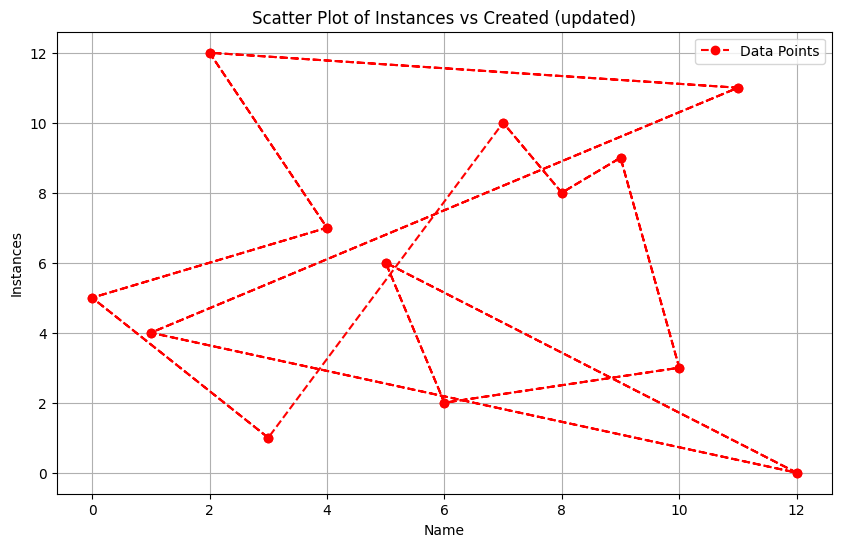

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(X, Y, color='red', marker='o', linestyle='--') 
plt.xlabel('Name') 
plt.ylabel('Instances')
# plt.gca().invert_yaxis()
plt.title('Scatter Plot of Instances vs Created (updated)')
plt.grid()
plt.legend(['Data Points'])  
plt.show()
